In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

from fully_connected_poisson import FullyConnectedPoissonNetwork
from vem import ExponentialRW

In [2]:
num_nodes = 30; num_groups = 2; T_max = 100
lam_matrix = np.array([[2, 3],
                       [1, 5]])

In [3]:
FCP = FullyConnectedPoissonNetwork(num_nodes, num_groups, T_max,
                                   lam_matrix)
sampled_network, groups_in_regions = FCP.sample_network(change_point=True, num_cps=1)
change_node = FCP.changing_node; change_time = FCP.change_point_time

In [5]:
time_step = 2; n_EM_its = 5; n_fp_its = 5
xi1 = 0.01; xi2 = 0.1; eta_base = 0.01


EXP = ExponentialRW(num_nodes, num_groups, T_max, sampled_network, time_step,
                    xi1, xi2, eta_base)
tau_store, pi_store, lam_store, group_preds_store = EXP.run_VEM(n_EM_its, n_fp_its)

Beginning procedure...
...Iteration: 1 of 49...
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (99,) and (49, 1)

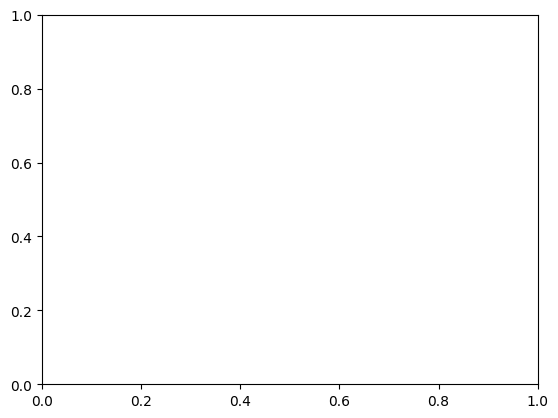

In [6]:
plt.plot(np.arange(99), [tau_store[k][change_node,0] for k in tau_store])
# 
# plt.plot(np.arange(99), [lam_store[k][0,0] for k in lam_store])
# plt.plot(np.arange(99), [lam_store[k][1,0] for k in lam_store])
# plt.plot(np.arange(99), [lam_store[k][1,1] for k in lam_store])
# plt.plot(np.arange(99), [lam_store[k][0,1] for k in lam_store])

In [5]:
a = np.array([[1,2], [3,4], [5,6]])
len(a)

3

In [6]:
tau_k = np.array([1,2,3,4,5])
tau_m = np.array([6,7,8,9,10])
I = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])

tau_k.reshape((5,1)) * tau_m.reshape((1,5))

array([[ 6,  7,  8,  9, 10],
       [12, 14, 16, 18, 20],
       [18, 21, 24, 27, 30],
       [24, 28, 32, 36, 40],
       [30, 35, 40, 45, 50]])

In [9]:
np.sum(tau_k.reshape((5,1)) * tau_m.reshape((1,5)))

600

In [31]:
import numpy as np

# Create a sample array of shape (N,)
array_N = np.array([1, 2, 3, 4])  # Replace this with your own array

# Create a sample NxN matrix
N = len(array_N)  # You can also specify the size N directly
matrix_NxN = np.random.rand(N, N)  # Replace this with your own matrix

# Compute the dot product with each row of the matrix
dot_products = np.sum(array_N * matrix_NxN, axis=1)

print(dot_products)


[4.62645271 7.11193236 3.69052261 2.14508471]


In [32]:
matrix_NxN

array([[0.76945121, 0.43962071, 0.51009186, 0.36187112],
       [0.76651095, 0.65514668, 0.51708846, 0.87096566],
       [0.15965931, 0.84008961, 0.60500524, 0.00891709],
       [0.24144094, 0.36835851, 0.19901013, 0.14247409]])

In [33]:
matrix_NxN[0,0] + 2*matrix_NxN[0,1] + 3*matrix_NxN[0,2] + 4*matrix_NxN[0,3]

4.6264527096422885